## EcodeCamp Software Company
## Name : Sheema Masood 
## Data Science Internship
### AUGUST 2024 TO SEPTEMBER 2024
--------------------------------------------------------------------------------------------------------------------------------------------------------

# Task 3: Image Classification Using Convolutional Neural Networks (CNNs)

### Objective
#### Develop an image classification model using Convolutional Neural Networks (CNNs) to categorize images into different classes.

### Task Roadmap

#### 1. Data Collection
- **Dataset:** Use an image classification dataset with labeled images (e.g., CIFAR-10, MNIST).
- **Review:** Review image features and class labels.

#### 2. Data Preprocessing
- **Resize and Normalize:** Resize and normalize images.
- **Data Augmentation:** Augment data to improve model performance.

#### 3. Model Building
- **CNN Architecture:** Build a CNN architecture with layers such as Convolutional, Pooling, and Dense layers.
- **Training and Evaluation:** Train the model and evaluate its performance using metrics like accuracy.

#### 4. Deployment
- **Deploy the Model:** Deploy the model using a web framework for real-time image classification.
- **User Interface:** Create a user interface to upload and classify images.
and classify images.


## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import RMSprop

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

In [3]:
# Import necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

## 1. Load the data

In [4]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [5]:
# Check the shape of the dataset
print(f'Training data shape: {train_images.shape}')
print(f'Testing data shape: {test_images.shape}')


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


## 2. Visualize Class Distribution
For Image Data Loaded from Keras:
- Step 1: Convert Labels to a Numpy Array

In [6]:
# Flatten labels to 1D array
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

- Step 2: Count and Plot Class Distribution

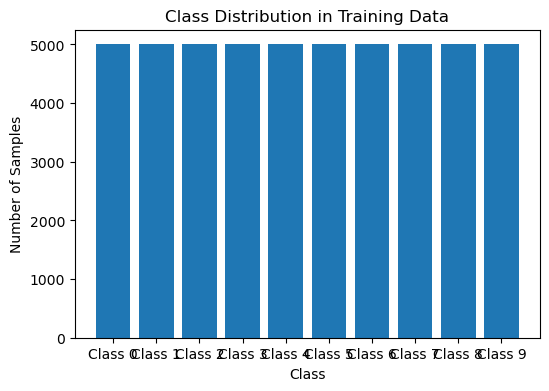

In [7]:
# Count occurrences of each class in training data
unique_train, counts_train = np.unique(train_labels, return_counts=True)
class_counts_train = dict(zip(unique_train, counts_train))

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(class_counts_train.keys(), class_counts_train.values())
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=list(class_counts_train.keys()), labels=[f'Class {i}' for i in class_counts_train.keys()])
plt.show()

- Step 3: Visualize Sample Images from Each Class

In [8]:
# CIFAR-10 class names
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

In [9]:
def plot_images(images, labels, class_names, num_images=3):
    plt.figure(figsize=(10, 10))
    for class_id in np.unique(labels):
        # Find indices of images for this class
        indices = np.where(labels == class_id)[0]
        # Select a few images (e.g., first `num_images`)
        selected_indices = indices[:num_images]
        for i, idx in enumerate(selected_indices):
            plt.subplot(len(np.unique(labels)), num_images, class_id * num_images + i + 1)
            plt.imshow(images[idx])
            plt.title(class_names[class_id])
            plt.axis('off')
    plt.show()


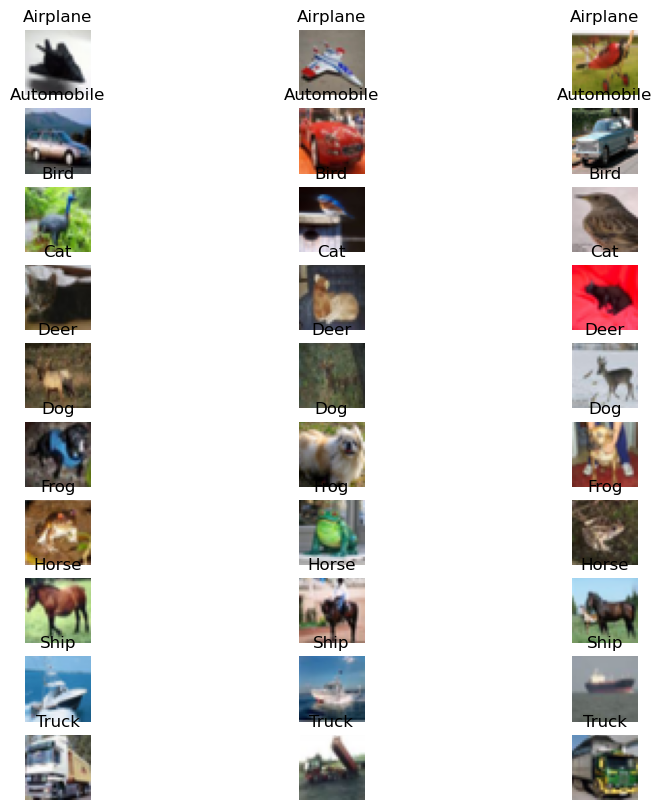

In [10]:
#Plot a few images from each class
plot_images(train_images, train_labels, class_names)

# 3. Check for Missing Data
- Step 1: Check Missing Values in Labels

In [11]:
# Check for missing values in labels array
if np.any(np.isnan(train_labels)):
    print("Missing values found in training labels.")
else:
    print("No missing values in training labels.")

if np.any(np.isnan(test_labels)):
    print("Missing values found in test labels.")
else:
    print("No missing values in test labels.")


No missing values in training labels.
No missing values in test labels.


- Step 2: Check Missing Values in Images

In [12]:
# Check for missing values in image arrays
if np.any(np.isnan(train_images)) or np.any(np.isnan(test_images)):
    print("Missing values found in images.")
else:
    print("No missing values in images.")


No missing values in images.


## Summary
1. **Class Distribution**: The dataset is well-balanced with an equal number of samples per class.
2. **Missing Data**: There are no missing values in either the labels or images.
   
With these findings, we can proceed to data preprocessing, model selection, and training without needing to address class imbalance or missing data issues.

### Visualize a Few Images with Their Labels

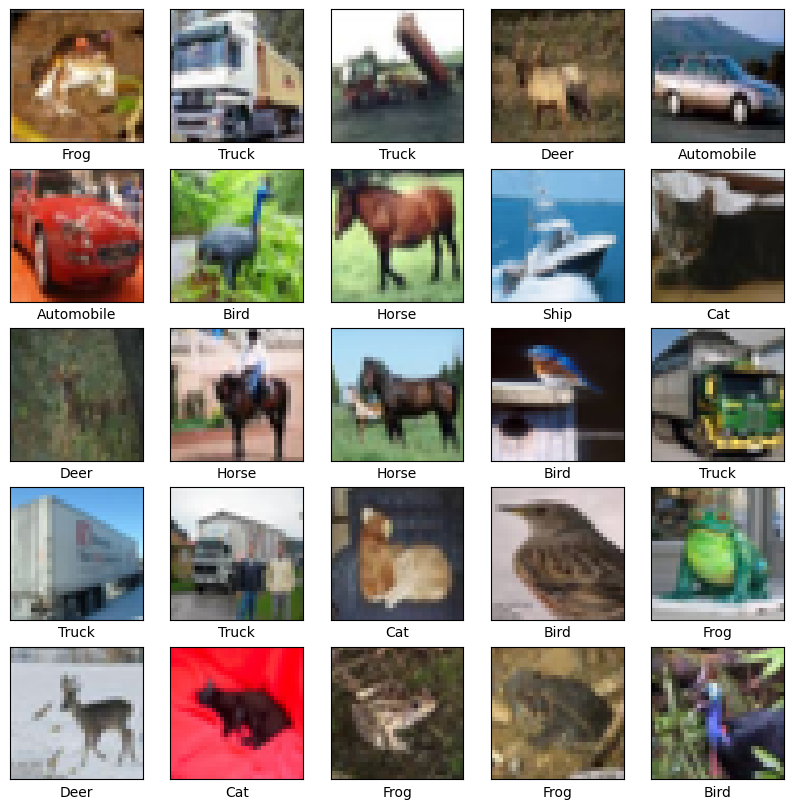

In [25]:
# Display the first few images with their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


### The blurriness won't affect the performance of CNN since the model will be trained on the original 32x32 images but to visualize we can adjust its resolution for clarity


## Improving Image Display Clarity

#### Let's adjust the display so that the images are shown in their native 32x32 pixel resolution. By displaying them at a smaller size, the images will appear clearer and less pixelated.

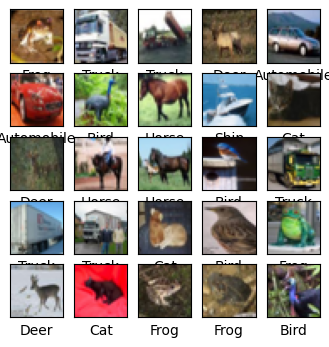

In [27]:
# Display the first few images with their labels at native resolution
plt.figure(figsize=(4,4))  # Smaller figure size to match the resolution
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]], fontsize=10)
plt.show()


### Review Image Features:

In [28]:
# Check the shape of the dataset
print(f'Training data shape: {train_images.shape}')
print(f'Testing data shape: {test_images.shape}')
print(f'Number of training samples: {train_images.shape[0]}')
print(f'Number of testing samples: {test_images.shape[0]}')

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Number of training samples: 50000
Number of testing samples: 10000


In [29]:
# Display data type and range of pixel values
print(f'Data type of images: {train_images.dtype}')
print(f'Minimum pixel value: {train_images.min()}')
print(f'Maximum pixel value: {train_images.max()}')


Data type of images: float64
Minimum pixel value: 0.0
Maximum pixel value: 1.0


## Review Class Labels:

In [30]:
# Print class names
print("Class names:", class_names)

# Display the first 10 labels from the training set
print("First 10 labels (numeric):", train_labels[:10].flatten())

# Convert numeric labels to class names
print("First 10 labels (class names):", [class_names[i] for i in train_labels[:10].flatten()])


Class names: ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
First 10 labels (numeric): [6 9 9 4 1 1 2 7 8 3]
First 10 labels (class names): ['Frog', 'Truck', 'Truck', 'Deer', 'Automobile', 'Automobile', 'Bird', 'Horse', 'Ship', 'Cat']


### Summary of Review of Image Features and Class Labels

#### Image Features:
- CIFAR-10 images are 32x32 pixels in size with 3 color channels.
- Pixel values range from 0 to 255.

#### Class Labels:
- The dataset has 10 classes, each represented by numeric labels (0-9).
- We've visually inspected a few images and their labels.


## Data Preprocessing:

#### 1. Normalizing the Images
Normalization typically involves scaling the pixel values from their original range of 0-255 to a range of 0-1. This is done by dividing each pixel value by 255.

In [ ]:
# Normalize the images to the range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Verify normalization by checking the new range of pixel values
print(f'Minimum pixel value after normalization: {train_images.min()}')
print(f'Maximum pixel value after normalization: {train_images.max()}')


#### 2. Data Augmentation
Data augmentation is used to artificially increase the size of the training dataset by creating modified versions of images in the dataset. This helps improve the model's generalization by introducing variability.

we can use Keras' ImageDataGenerator to perform data augmentation:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    # Randomly rotate images by up to 20 degrees.
    rotation_range=20,
    
    # Randomly shift images horizontally by up to 20% of the image width.
    width_shift_range=0.2,
    
    # Randomly shift images vertically by up to 20% of the image height.
    height_shift_range=0.2,
    
    # Apply shear transformations with angles up to 20 degrees.
    shear_range=0.2,
    
    # Zoom in or out by up to 20%.
    zoom_range=0.2,
    
    # Randomly flip images horizontally.
    horizontal_flip=True,
    
    # Fill newly created pixels with the nearest pixel value after transformations.
    fill_mode='nearest'
)


In [23]:
# Fit the generator on the training data
datagen.fit(train_images)

In [36]:
print("train_images shape:", train_images.shape)
print("train_labels shape:", train_labels.shape)
print("Sample train_labels:", train_labels[:9])
print("Sample class_names:", class_names)

train_images shape: (50000, 32, 32, 3)
train_labels shape: (50000,)
Sample train_labels: [6 9 9 4 1 1 2 7 8]
Sample class_names: ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


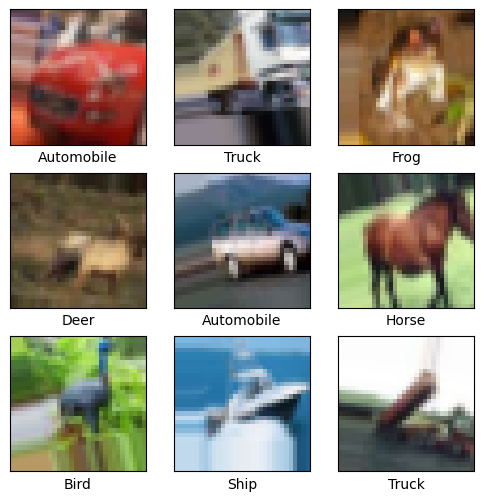

In [37]:
# Display a few augmented images
plt.figure(figsize=(6, 6))  # Adjust size to fit 3x3 grid
for X_batch, y_batch in datagen.flow(train_images[:9], train_labels[:9], batch_size=9):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_batch[i])

        # Convert y_batch to the correct format for indexing
        plt.xlabel(class_names[int(y_batch[i])])
    plt.show()
    break  # We only want to visualize one batch of augmented images

### 3. One Hot Encoding of Class LAbels

In [38]:
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=10)
test_labels_one_hot = to_categorical(test_labels, num_classes=10)

#### verifying the one hot encoding

In [39]:
print("Sample one-hot encoded labels:")
print(train_labels_one_hot[:5])  # Print the first 5 one-hot encoded labels


Sample one-hot encoded labels:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Summary of Data Preprocessing

#### 1. Normalization:
- **Rescaled** the pixel values of the images from the range [0, 255] to [0, 1].
- This scaling helps improve the training process by ensuring that all input values are on a similar scale.

#### 2. Data Augmentation:
- Applied various data augmentation techniques to the training dataset to improve model generalization, including:
  - **Rotation**: Randomly rotated images by up to 15 degrees.
  - **Shifts**: Applied horizontal and vertical shifts to the images by up to 10% of the total width/height.
  - **Horizontal Flips**: Randomly flipped images horizontally.
  - **Zoom**: Applied random zooms to the images by up to 10%.
- **Fit the data generator** on the training data to create augmented versions during training.

#### Output:
- Ensured that the training data is more diverse and better suited to prevent overfitting, leading to a more robust model.


# Model Building

### 1. Build the CNN Architecture

We'll start by defining the CNN architecture. A typical CNN consists of multiple convolutional layers followed by pooling layers and dense layers.ax activation function to output class probabilities.

## Model Architecture Explanation

### Input Layer
The model starts with an input layer that accepts images with a size of 32x32 pixels and 3 color channels (RGB). This is specified by the `InputLayer(input_shape=(32, 32, 3))`. The input layer defines the shape of the data the model will process initially.

### Upsampling Layers
Next, we use a series of upsampling layers to increase the dimensions of the input images. These layers are:
- **First Upsampling Layer**: Doubles the image dimensions from 32x32 to 64x64 pixels.
- **Second Upsampling Layer**: Further increases the image size from 64x64 to 128x128 pixels.
- **Third Upsampling Layer**: Finally scales the image from 128x128 to 256x256 pixels.

Upsampling is used here to resize the images to match the input dimensions expected by the pre-trained ResNet50 model, which requires 256x256 pixel images.

### Pre-trained ResNet50
We utilize the ResNet50 model with weights pre-trained on the ImageNet dataset, but without its top fully connected layers (`include_top=False`). This setup allows us to use ResNet50 as a feature extractor. ResNet50 is a powerful convolutional neural network known for its ability to capture high-level features from images.

### Flattening
After feature extraction with ResNet50, the output is a 3D tensor. The `Flatten` layer converts this 3D tensor into a 1D vector. This transformation is necessary because fully connected (dense) layers require 1D input.

### Fully Connected Layers
Following flattening, the model includes several dense layers:
- **Dense Layer (128 units)**: Applies a fully connected layer with 128 neurons and ReLU activation function to learn complex patterns.
- **Dropout Layer (0.5)**: A dropout layer with a dropout rate of 0.5 is used to prevent overfitting by randomly dropping 50% of the neurons during training.
- **Dense Layer (64 units)**: Another fully connected layer with 64 neurons and ReLU activation function for further learning.
- **Dropout Layer (0.5)**: Another dropout layer to continue regularizing the model.
- **Batch Normalization**: Applied to normalize the activations of the previous layers and improve training stability.

### Output Layer
The final dense layer has 10 units (one for each class) with a softmax activation function. This layer produces probabilities for each class, allowing the model to make predictions.

### Benefits of the Approach
- **Flexibility**: By using upsampling layers in the model, you can handle original image resolutions and avoid the need to resize images during preprocessing, which is useful for deployment.
- **Pre-trained Features**: Leveraging the pre-trained ResNet50 model enhances performance by using learned features from a large, diverse dataset (ImageNet), improving the ability to classify complex images.

This architecture allows the model to benefit from pre-trained features while handling images of various sizes effectively.


In [44]:
# Initialize the pre-trained ResNet50 model (excluding the top fully connected layers)
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Define the number of output classes
num_of_classes = 10

# Define the model
model = models.Sequential()

# Step 1: Input layer for the original image size (32x32)
model.add(layers.InputLayer(input_shape=(32, 32, 3)))  # Original image size

# Step 2: Upsampling to match the input size expected by ResNet50 (256x256)
model.add(layers.UpSampling2D(size=(2, 2)))  # Upsample by a factor of 2 to reach 64x64
model.add(layers.UpSampling2D(size=(2, 2)))  # Upsample by another factor of 2 to reach 128x128
model.add(layers.UpSampling2D(size=(2, 2)))  # Upsample by another factor of 2 to reach 256x256

# Step 3: Add the pre-trained ResNet50 model
model.add(convolutional_base)  # Extract features using ResNet50

# Step 4: Flatten the output of ResNet50 for the dense layers
model.add(layers.Flatten())  # Flatten the feature maps

# Step 5: Add fully connected layers for classification
model.add(layers.BatchNormalization())  # Batch normalization to stabilize training
model.add(layers.Dense(128, activation='relu'))  # Dense layer with ReLU activation
model.add(layers.Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(layers.BatchNormalization())  # Another batch normalization layer
model.add(layers.Dense(64, activation='relu'))  # Additional dense layer with ReLU activation
model.add(layers.Dropout(0.5))  # Dropout layer to further prevent overfitting
model.add(layers.BatchNormalization())  # Batch normalization layer
model.add(layers.Dense(num_of_classes, activation='softmax'))  # Output layer with softmax activation

# Compile the model
optimizer = RMSprop(learning_rate=2e-5)  # Use RMSprop optimizer with a low learning rate
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', 
              metrics=['accuracy'])  # Compile the model with categorical crossentropy loss


# Display the model's architecture
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ up_sampling2d_6 (UpSampling2D)       │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_8 (UpSampling2D)       │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 131072)              │         524,288 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,899,018 (156.02 MB)

 Trainable params: 40,583,370 (154.81 MB)

 Non-trainable params: 315,648 (1.20 MB)

## Model Summary:



## Train the Model

In [31]:
# Learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Then start training
history = model.fit(
    train_images, train_labels_one_hot,
    epochs=100,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[lr_scheduler, early_stopping, checkpoint]
)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.2000 - loss: 2.3453
Epoch 1: val_accuracy improved from -inf to 0.36450, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 399s 435ms/step - accuracy: 0.2001 - loss: 2.3450 - val_accuracy: 0.3645 - val_loss: 1.7449 - learning_rate: 0.0100
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.3399 - loss: 1.8606
Epoch 2: val_accuracy improved from 0.36450 to 0.42630, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 335s 428ms/step - accuracy: 0.3399 - loss: 1.8605 - val_accuracy: 0.4263 - val_loss: 1.6883 - learning_rate: 0.0100
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.4297 - loss: 1.6792
Epoch 3: val_accuracy improved from 0.42630 to 0.52360, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 327s 417ms/step - accuracy: 0.4297 - loss: 1.6791 - val_accuracy: 0.5236 - val_loss: 1.4447 - learning_rate: 0.0100
Epoch 4/100
782/782 ━━━━━━━━━━━━━━

### Analysis of Current Model Performance

Our model is showing promising results with a training accuracy of **91.97%** and a validation accuracy of **86.48%** at epoch 40. 
## Continuing Training with Reduced Learning Rate

Aer 40 epochs , , the validation accuracy plateaued, indicating that the model might have reached its peak performance with the current learning rate. To further fine-tune the model, we decided to reduce the learning rate by 10% and continue training for 5 more epochs.

### Steps Taken:
1. **Reduced Learning Rate**: The learning rate was decreased from its current value by 10% to allow for more fine-tuned adjustments to the model weights.
2. **Continued Training**: The model was trained for an additional 5 epochs with the new, lower learning rate. This approach aims to squeeze out additional performance improvements while avoiding overshooting optimal weights.

### Rationale:
- **Learning Rate Reduction**: As the training progresses, reducing the learning rate can help the model make smaller, more precise updates to the weights, potentially improving performance without overfitting.

The training process was monitored using the same callbacks: early stopping, learning rate reduction on plateau, and model checkpointing to save the best model based on validation accuracy.
kpoint]
)



In [39]:
# Reduce learning rate by 10%
current_lr = model.optimizer.learning_rate.numpy()
new_lr = current_lr * 0.1
model.optimizer.learning_rate.assign(new_lr)

# Train the model for 5 more epochs
history_continued = model.fit(
    train_images, train_labels_one_hot,
    epochs=5,  # Additional epochs
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[lr_scheduler, early_stopping, checkpoint]
)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9026 - loss: 0.4668
Epoch 1: val_accuracy improved from 0.86480 to 0.86530, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 440s 514ms/step - accuracy: 0.9026 - loss: 0.4668 - val_accuracy: 0.8653 - val_loss: 0.6108 - learning_rate: 5.0000e-04
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9095 - loss: 0.4462
Epoch 2: val_accuracy improved from 0.86530 to 0.86580, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 344s 439ms/step - accuracy: 0.9095 - loss: 0.4462 - val_accuracy: 0.8658 - val_loss: 0.6118 - learning_rate: 5.0000e-04
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.9104 - loss: 0.4449
Epoch 3: val_accuracy improved from 0.86580 to 0.86650, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 327s 418ms/step - accuracy: 0.9104 - loss: 0.4449 - val_accuracy: 0.8665 - val_loss: 0.6127 - learning_rate: 5.0000e-04
Epoch 4/5
782/782 ━━━━━━━

## Summary of Additional Training with Reduced Learning Rate

### Performance Overview
After training the model for 5 additional epochs with a reduced learning rate (from 0.005 to 0.0005):

- **Validation Accuracy**:
  - Improved slightly from 86.48% to 86.75%, indicating a marginal improvement in the model's ability to generalize to unseen data.
  - The highest validation accuracy achieved was 86.75%, which was saved as the best model.

- **Training Accuracy**:
  - Increased from 90.26% to 91.27%, showing that the model continues to learn from the training data, albeit with smaller improvements.

- **Loss**:
  - Both training and validation losses showed minor changes, with the final training loss at 0.4356 and validation loss at 0.6127.

### Key Observations
- **Marginal Improvements**: The model achieved slight improvements in both validation accuracy and training accuracy, suggesting that the learning rate reduction helped in fine-tuning the model.
- **Stable Validation Loss**: The validation loss remained relatively stable, indicating that the model is not overfitting despite the extended training.

### Conclusion
Given the slight improvement in validation accuracy and the overall stability in performance metrics, this version of the model can be considered well-tuned and ready for deployment. The model saved at epoch 4/5, with a validation accuracy of 86.75%, is recommended for deployment.


## Evaluate the Model

### 1. Load the best model 
Since I've saved the best model during training, start by loading it to ensure we are  evaluating the most optimal version.

In [42]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model.keras')


#### 2. Evaluation on test set

In [44]:
# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels_one_hot, verbose=1)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.8676 - loss: 0.6146
Test Accuracy: 86.75%
Test Loss: 0.6122


In [56]:
# Load the best model for final evaluation or deployment
best_model = load_model('best_model.keras')

NameError: name 'history' is not defined

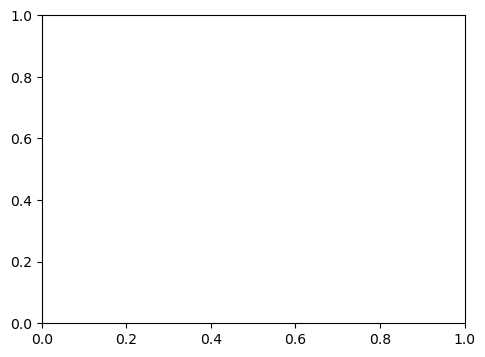

In [20]:
import matplotlib.pyplot as mp
mp.figure(figsize=(12, 4))

mp.subplot(1, 2, 1)
mp.plot(history.history['accuracy'])
mp.plot(history.history['val_accuracy'])
mp.title('Model Accuracy')
mp.ylabel('Accuracy')
mp.xlabel('Epoch')
mp.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
mp.subplot(1, 2, 2)
mp.plot(history.history['loss'])
mp.plot(history.history['val_loss'])
mp.title('Model Loss')
mp.ylabel('Loss')
mp.xlabel('Epoch')
mp.legend(['Train', 'Validation'], loc='upper left')

mp.show()